## Work
### 請結合前面的知識與程式碼，比較不同的 regularization 的組合對訓練的結果與影響：如 dropout, regularizers, batch-normalization 等

In [1]:
import os
import keras
import itertools
# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

C:\Users\Colt\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
from keras.regularizers import l1, l2, l1_l2
from keras.layers import Dropout
from keras.layers import BatchNormalization

#建立神經網路，並加入 regularizers, Dropout, BatchNormalization
def build_mlp(input_shape, 
              output_units=10, 
              num_neurons=[512, 256, 128], 
              is_batchNorn=True,
              l2_ratio=0, 
              drp_ratio=0):
    
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1), kernel_regularizer=l2(l2_ratio))(input_layer)
            
            #BatchNormalization
            if is_batchNorn == True:
                x = BatchNormalization()(x)
            #Dropout
            x = Dropout(drp_ratio)(x)
            
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1),kernel_regularizer=l2(l2_ratio))(x)
            #BatchNormalization
            if is_batchNorn == True:
                x = BatchNormalization()(x)
            #Dropout
            x = Dropout(drp_ratio)(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
"""Code Here
設定超參數
"""
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95

#lab
IS_BN = [True, False]
L2_EXP = [0., 1e-6, 1e-8]
Dropout_EXP = [0., 0.4, 0.8]

In [7]:
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
results = {}

for i,(is_bn, l2_exp, drop_exp) in enumerate(itertools.product(IS_BN,L2_EXP,Dropout_EXP)):
    keras.backend.clear_session()
    print("[%i] bn:%s  l2_exp:%.2f  drop_exp: %.2f" % (i, is_bn, l2_exp, drop_exp))
    
    model = build_mlp(input_shape=x_train.shape[1:], is_batchNorn=is_bn, l2_ratio=l2_exp, drp_ratio=drop_exp)
    model.summary()
    optimizer = keras.optimizers. Adam(lr=LEARNING_RATE, epsilon=None, decay=0.0)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_data=(x_test, y_test),verbose=1, shuffle=True)

    # Collect results
    exp_name_tag = ("exp-%s" % (i))
    results[exp_name_tag] = {'train-loss': model.history.history["loss"],
                             'valid-loss': model.history.history["val_loss"],
                             'train-acc': model.history.history["acc"],
                             'valid-acc': model.history.history["val_acc"]}

[0] bn:True  l2_exp:0.00  drop_exp: 0.00
Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_2 (Batch (None, 256)               1024      
_____________________________

Epoch 43/50
50000/50000 [==============================] - 4s 84us/step - loss: 0.3039 - acc: 0.8914 - val_loss: 2.6036 - val_acc: 0.4721
Epoch 44/50
50000/50000 [==============================] - 4s 88us/step - loss: 0.2947 - acc: 0.8951 - val_loss: 2.6822 - val_acc: 0.4672
Epoch 45/50
50000/50000 [==============================] - 4s 77us/step - loss: 0.2939 - acc: 0.8937 - val_loss: 2.5745 - val_acc: 0.4884
Epoch 46/50
50000/50000 [==============================] - 4s 80us/step - loss: 0.2769 - acc: 0.9030 - val_loss: 2.7666 - val_acc: 0.4706
Epoch 47/50
50000/50000 [==============================] - 4s 86us/step - loss: 0.2674 - acc: 0.9053 - val_loss: 2.7674 - val_acc: 0.4740
Epoch 48/50
50000/50000 [==============================] - 4s 87us/step - loss: 0.2581 - acc: 0.9093 - val_loss: 2.6947 - val_acc: 0.4790
Epoch 49/50
50000/50000 [==============================] - 4s 77us/step - loss: 0.2553 - acc: 0.9091 - val_loss: 2.8302 - val_acc: 0.4831
Epoch 50/50
50000/50000 [=========

50000/50000 [==============================] - 4s 76us/step - loss: 1.4854 - acc: 0.4700 - val_loss: 1.4333 - val_acc: 0.4907
Epoch 37/50
50000/50000 [==============================] - 4s 77us/step - loss: 1.4786 - acc: 0.4735 - val_loss: 1.4884 - val_acc: 0.4709
Epoch 38/50
50000/50000 [==============================] - 4s 77us/step - loss: 1.4767 - acc: 0.4761 - val_loss: 1.3972 - val_acc: 0.4999
Epoch 39/50
50000/50000 [==============================] - 4s 77us/step - loss: 1.4732 - acc: 0.4739 - val_loss: 1.4072 - val_acc: 0.4938
Epoch 40/50
50000/50000 [==============================] - 4s 76us/step - loss: 1.4672 - acc: 0.4785 - val_loss: 1.4317 - val_acc: 0.4844
Epoch 41/50
50000/50000 [==============================] - 4s 77us/step - loss: 1.4691 - acc: 0.4790 - val_loss: 1.4219 - val_acc: 0.4919
Epoch 42/50
50000/50000 [==============================] - 4s 76us/step - loss: 1.4655 - acc: 0.4773 - val_loss: 1.4086 - val_acc: 0.4853
Epoch 43/50
50000/50000 [=====================

Epoch 32/50
50000/50000 [==============================] - 4s 77us/step - loss: 1.9408 - acc: 0.2776 - val_loss: 1.7953 - val_acc: 0.3412
Epoch 33/50
50000/50000 [==============================] - 4s 76us/step - loss: 1.9376 - acc: 0.2792 - val_loss: 1.8070 - val_acc: 0.3386
Epoch 34/50
50000/50000 [==============================] - 4s 77us/step - loss: 1.9462 - acc: 0.2749 - val_loss: 1.8241 - val_acc: 0.3204
Epoch 35/50
50000/50000 [==============================] - 4s 77us/step - loss: 1.9439 - acc: 0.2782 - val_loss: 1.8119 - val_acc: 0.3325
Epoch 36/50
50000/50000 [==============================] - 4s 77us/step - loss: 1.9406 - acc: 0.2791 - val_loss: 1.7943 - val_acc: 0.3430
Epoch 37/50
50000/50000 [==============================] - 4s 76us/step - loss: 1.9372 - acc: 0.2766 - val_loss: 1.7913 - val_acc: 0.3449
Epoch 38/50
50000/50000 [==============================] - 4s 77us/step - loss: 1.9362 - acc: 0.2801 - val_loss: 1.7981 - val_acc: 0.3418
Epoch 39/50
50000/50000 [=========

Epoch 28/50
50000/50000 [==============================] - 4s 79us/step - loss: 0.5252 - acc: 0.8152 - val_loss: 2.0892 - val_acc: 0.4777
Epoch 29/50
50000/50000 [==============================] - 4s 79us/step - loss: 0.4996 - acc: 0.8243 - val_loss: 2.0753 - val_acc: 0.4735
Epoch 30/50
50000/50000 [==============================] - 4s 80us/step - loss: 0.4872 - acc: 0.8277 - val_loss: 2.0842 - val_acc: 0.4820
Epoch 31/50
50000/50000 [==============================] - 4s 80us/step - loss: 0.4635 - acc: 0.8374 - val_loss: 2.0881 - val_acc: 0.4857
Epoch 32/50
50000/50000 [==============================] - 4s 80us/step - loss: 0.4454 - acc: 0.8432 - val_loss: 2.1371 - val_acc: 0.4837
Epoch 33/50
50000/50000 [==============================] - 4s 79us/step - loss: 0.4247 - acc: 0.8493 - val_loss: 2.1354 - val_acc: 0.4821
Epoch 34/50
50000/50000 [==============================] - 4s 79us/step - loss: 0.4154 - acc: 0.8543 - val_loss: 2.4534 - val_acc: 0.4527
Epoch 35/50
50000/50000 [=========

Epoch 24/50
50000/50000 [==============================] - 4s 87us/step - loss: 1.5232 - acc: 0.4598 - val_loss: 1.4513 - val_acc: 0.4797
Epoch 25/50
50000/50000 [==============================] - 4s 88us/step - loss: 1.5229 - acc: 0.4566 - val_loss: 1.4395 - val_acc: 0.4825
Epoch 26/50
50000/50000 [==============================] - 4s 88us/step - loss: 1.5177 - acc: 0.4569 - val_loss: 1.4301 - val_acc: 0.4908
Epoch 27/50
50000/50000 [==============================] - 4s 88us/step - loss: 1.5172 - acc: 0.4589 - val_loss: 1.5424 - val_acc: 0.4508
Epoch 28/50
50000/50000 [==============================] - 4s 88us/step - loss: 1.5127 - acc: 0.4617 - val_loss: 1.4560 - val_acc: 0.4803
Epoch 29/50
50000/50000 [==============================] - 4s 87us/step - loss: 1.5147 - acc: 0.4599 - val_loss: 1.4576 - val_acc: 0.4722
Epoch 30/50
50000/50000 [==============================] - 4s 87us/step - loss: 1.5123 - acc: 0.4605 - val_loss: 1.4470 - val_acc: 0.4762
Epoch 31/50
50000/50000 [=========

Epoch 20/50
50000/50000 [==============================] - 4s 82us/step - loss: 1.9397 - acc: 0.2807 - val_loss: 1.8129 - val_acc: 0.3381
Epoch 21/50
50000/50000 [==============================] - 4s 83us/step - loss: 1.9343 - acc: 0.2833 - val_loss: 1.7981 - val_acc: 0.3474
Epoch 22/50
50000/50000 [==============================] - 4s 84us/step - loss: 1.9351 - acc: 0.2822 - val_loss: 1.8057 - val_acc: 0.3433
Epoch 23/50
50000/50000 [==============================] - 4s 87us/step - loss: 1.9289 - acc: 0.2848 - val_loss: 1.7955 - val_acc: 0.3402
Epoch 24/50
50000/50000 [==============================] - 4s 88us/step - loss: 1.9258 - acc: 0.2881 - val_loss: 1.7893 - val_acc: 0.3439
Epoch 25/50
50000/50000 [==============================] - 4s 87us/step - loss: 1.9270 - acc: 0.2893 - val_loss: 1.8019 - val_acc: 0.3384
Epoch 26/50
50000/50000 [==============================] - 4s 88us/step - loss: 1.9252 - acc: 0.2870 - val_loss: 1.8093 - val_acc: 0.3284
Epoch 27/50
50000/50000 [=========

Epoch 16/50
50000/50000 [==============================] - 4s 87us/step - loss: 0.8522 - acc: 0.7008 - val_loss: 1.6849 - val_acc: 0.4652
Epoch 17/50
50000/50000 [==============================] - 4s 86us/step - loss: 0.8127 - acc: 0.7132 - val_loss: 1.7229 - val_acc: 0.4593
Epoch 18/50
50000/50000 [==============================] - 4s 86us/step - loss: 0.7850 - acc: 0.7218 - val_loss: 1.6913 - val_acc: 0.4804
Epoch 19/50
50000/50000 [==============================] - 4s 87us/step - loss: 0.7672 - acc: 0.7246 - val_loss: 1.6947 - val_acc: 0.4785
Epoch 20/50
50000/50000 [==============================] - 4s 87us/step - loss: 0.7291 - acc: 0.7423 - val_loss: 1.6731 - val_acc: 0.4816
Epoch 21/50
50000/50000 [==============================] - 4s 87us/step - loss: 0.7064 - acc: 0.7500 - val_loss: 1.7326 - val_acc: 0.4799
Epoch 22/50
50000/50000 [==============================] - 4s 87us/step - loss: 0.6745 - acc: 0.7613 - val_loss: 1.8373 - val_acc: 0.4764
Epoch 23/50
50000/50000 [=========

Epoch 12/50
50000/50000 [==============================] - 4s 82us/step - loss: 1.5813 - acc: 0.4319 - val_loss: 1.5186 - val_acc: 0.4543
Epoch 13/50
50000/50000 [==============================] - 4s 82us/step - loss: 1.5674 - acc: 0.4391 - val_loss: 1.5559 - val_acc: 0.4409
Epoch 14/50
50000/50000 [==============================] - 4s 82us/step - loss: 1.5626 - acc: 0.4425 - val_loss: 1.4486 - val_acc: 0.4809
Epoch 15/50
50000/50000 [==============================] - 4s 82us/step - loss: 1.5527 - acc: 0.4457 - val_loss: 1.5134 - val_acc: 0.4523
Epoch 16/50
50000/50000 [==============================] - 4s 82us/step - loss: 1.5562 - acc: 0.4452 - val_loss: 1.5386 - val_acc: 0.4464
Epoch 17/50
50000/50000 [==============================] - 4s 83us/step - loss: 1.5484 - acc: 0.4455 - val_loss: 1.4723 - val_acc: 0.4782
Epoch 18/50
50000/50000 [==============================] - 4s 82us/step - loss: 1.5415 - acc: 0.4501 - val_loss: 1.5705 - val_acc: 0.4328
Epoch 19/50
50000/50000 [=========

Epoch 8/50
50000/50000 [==============================] - 4s 87us/step - loss: 1.9731 - acc: 0.2604 - val_loss: 1.8669 - val_acc: 0.2883
Epoch 9/50
50000/50000 [==============================] - 5s 92us/step - loss: 1.9715 - acc: 0.2635 - val_loss: 1.8457 - val_acc: 0.3180
Epoch 10/50
50000/50000 [==============================] - 4s 88us/step - loss: 1.9569 - acc: 0.2698 - val_loss: 1.8581 - val_acc: 0.3078
Epoch 11/50
50000/50000 [==============================] - 4s 88us/step - loss: 1.9571 - acc: 0.2701 - val_loss: 1.8449 - val_acc: 0.3154
Epoch 12/50
50000/50000 [==============================] - 4s 88us/step - loss: 1.9540 - acc: 0.2708 - val_loss: 1.8485 - val_acc: 0.3204
Epoch 13/50
50000/50000 [==============================] - 4s 90us/step - loss: 1.9552 - acc: 0.2691 - val_loss: 1.8401 - val_acc: 0.3223
Epoch 14/50
50000/50000 [==============================] - 4s 88us/step - loss: 1.9505 - acc: 0.2714 - val_loss: 1.8257 - val_acc: 0.3268
Epoch 15/50
50000/50000 [===========

50000/50000 [==============================] - 4s 71us/step - loss: 1.4670 - acc: 0.4760 - val_loss: 1.4568 - val_acc: 0.4833
Epoch 7/50
50000/50000 [==============================] - 4s 71us/step - loss: 1.4344 - acc: 0.4875 - val_loss: 1.4553 - val_acc: 0.4826
Epoch 8/50
50000/50000 [==============================] - 4s 73us/step - loss: 1.4004 - acc: 0.5001 - val_loss: 1.4273 - val_acc: 0.4980
Epoch 9/50
50000/50000 [==============================] - 4s 72us/step - loss: 1.3774 - acc: 0.5120 - val_loss: 1.4127 - val_acc: 0.4967
Epoch 10/50
50000/50000 [==============================] - 4s 72us/step - loss: 1.3547 - acc: 0.5191 - val_loss: 1.4107 - val_acc: 0.5014
Epoch 11/50
50000/50000 [==============================] - 4s 71us/step - loss: 1.3233 - acc: 0.5289 - val_loss: 1.4443 - val_acc: 0.4908
Epoch 12/50
50000/50000 [==============================] - 4s 71us/step - loss: 1.2974 - acc: 0.5392 - val_loss: 1.3974 - val_acc: 0.5064
Epoch 13/50
50000/50000 [========================

Epoch 5/50
50000/50000 [==============================] - 4s 73us/step - loss: 1.9057 - acc: 0.2989 - val_loss: 1.8542 - val_acc: 0.3555
Epoch 6/50
50000/50000 [==============================] - 4s 72us/step - loss: 1.8897 - acc: 0.3067 - val_loss: 1.8532 - val_acc: 0.3436
Epoch 7/50
50000/50000 [==============================] - 4s 73us/step - loss: 1.8757 - acc: 0.3113 - val_loss: 1.8327 - val_acc: 0.3764
Epoch 8/50
50000/50000 [==============================] - 4s 72us/step - loss: 1.8614 - acc: 0.3183 - val_loss: 1.8197 - val_acc: 0.3662
Epoch 9/50
50000/50000 [==============================] - 4s 73us/step - loss: 1.8563 - acc: 0.3179 - val_loss: 1.8148 - val_acc: 0.3590
Epoch 10/50
50000/50000 [==============================] - 4s 72us/step - loss: 1.8465 - acc: 0.3276 - val_loss: 1.7868 - val_acc: 0.3742
Epoch 11/50
50000/50000 [==============================] - 4s 72us/step - loss: 1.8489 - acc: 0.3254 - val_loss: 1.8218 - val_acc: 0.3786
Epoch 12/50
50000/50000 [==============

50000/50000 [==============================] - 3s 68us/step - loss: 2.3027 - acc: 0.0981 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 4/50
50000/50000 [==============================] - 3s 69us/step - loss: 2.3028 - acc: 0.0986 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 5/50
50000/50000 [==============================] - 3s 68us/step - loss: 2.3026 - acc: 0.0982 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 6/50
50000/50000 [==============================] - 3s 68us/step - loss: 2.3028 - acc: 0.0978 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 7/50
50000/50000 [==============================] - 3s 69us/step - loss: 2.3027 - acc: 0.0973 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 8/50
50000/50000 [==============================] - 3s 69us/step - loss: 2.3027 - acc: 0.0968 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 9/50
50000/50000 [==============================] - 3s 69us/step - loss: 2.3027 - acc: 0.0990 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 10/50
50000/50000 [===========================

Epoch 2/50
50000/50000 [==============================] - 4s 71us/step - loss: 1.7086 - acc: 0.3889 - val_loss: 1.6465 - val_acc: 0.4182
Epoch 3/50
50000/50000 [==============================] - 4s 72us/step - loss: 1.6208 - acc: 0.4231 - val_loss: 1.6078 - val_acc: 0.4270
Epoch 4/50
50000/50000 [==============================] - 4s 71us/step - loss: 1.5499 - acc: 0.4493 - val_loss: 1.5904 - val_acc: 0.4312
Epoch 5/50
50000/50000 [==============================] - 4s 71us/step - loss: 1.5093 - acc: 0.4640 - val_loss: 1.4975 - val_acc: 0.4676
Epoch 6/50
50000/50000 [==============================] - 4s 71us/step - loss: 1.4679 - acc: 0.4763 - val_loss: 1.4900 - val_acc: 0.4708
Epoch 7/50
50000/50000 [==============================] - 4s 72us/step - loss: 1.4442 - acc: 0.4851 - val_loss: 1.4941 - val_acc: 0.4714
Epoch 8/50
50000/50000 [==============================] - 4s 71us/step - loss: 1.4150 - acc: 0.4952 - val_loss: 1.4433 - val_acc: 0.4917
Epoch 9/50
50000/50000 [=================

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 5s 97us/step - loss: 2.1617 - acc: 0.1820 - val_loss: 1.9457 - val_acc: 0.2882
Epoch 2/50
50000/50000 [==============================] - 4s 82us/step - loss: 2.0075 - acc: 0.2475 - val_loss: 1.9190 - val_acc: 0.3276
Epoch 3/50
50000/50000 [==============================] - 4s 82us/step - loss: 1.9559 - acc: 0.2674 - val_loss: 1.8967 - val_acc: 0.3274
Epoch 4/50
50000/50000 [==============================] - 4s 81us/step - loss: 1.9303 - acc: 0.2819 - val_loss: 1.8760 - val_acc: 0.3407
Epoch 5/50
50000/50000 [==============================] - 4s 80us/step - loss: 1.9088 - acc: 0.2939 - val_loss: 1.8346 - val_acc: 0.3600
Epoch 6/50
50000/50000 [==============================] - 4s 81us/step - loss: 1.9023 - acc: 0.2966 - val_loss: 1.8482 - val_acc: 0.3621
Epoch 7/50
50000/50000 [==============================] - 4s 81us/step - loss: 1.8856 - acc: 0.3069 - val_loss: 1.8312 - val_acc

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 5s 95us/step - loss: 2.4388 - acc: 0.1001 - val_loss: 2.3040 - val_acc: 0.1000
Epoch 2/50
50000/50000 [==============================] - 4s 77us/step - loss: 2.3041 - acc: 0.0975 - val_loss: 2.3040 - val_acc: 0.1000
Epoch 3/50
50000/50000 [==============================] - 4s 77us/step - loss: 2.3041 - acc: 0.0994 - val_loss: 2.3039 - val_acc: 0.0999
Epoch 4/50
50000/50000 [==============================] - 4s 78us/step - loss: 2.3045 - acc: 0.0979 - val_loss: 2.3039 - val_acc: 0.1000
Epoch 5/50
50000/50000 [==============================] - 4s 77us/step - loss: 2.3040 - acc: 0.0986 - val_loss: 2.3039 - val_acc: 0.1000
Epoch 6/50
50000/50000 [==============================] - 4s 77us/step - loss: 2.3040 - acc: 0.1008 - val_loss: 2.3039 - val_acc: 0.1000
Epoch 7/50
50000/50000 [==============================] - 4s 77us/step - loss: 2.3040 - acc: 0.0999 - val_loss: 2.3039 - val_acc

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 5s 91us/step - loss: 1.9207 - acc: 0.3083 - val_loss: 1.7528 - val_acc: 0.3674
Epoch 2/50
50000/50000 [==============================] - 4s 76us/step - loss: 1.7079 - acc: 0.3884 - val_loss: 1.6709 - val_acc: 0.3995
Epoch 3/50
50000/50000 [==============================] - 4s 76us/step - loss: 1.6140 - acc: 0.4247 - val_loss: 1.5599 - val_acc: 0.4402
Epoch 4/50
50000/50000 [==============================] - 4s 76us/step - loss: 1.5442 - acc: 0.4503 - val_loss: 1.5149 - val_acc: 0.4590
Epoch 5/50
50000/50000 [==============================] - 4s 76us/step - loss: 1.5035 - acc: 0.4649 - val_loss: 1.5004 - val_acc: 0.4628
Epoch 6/50
50000/50000 [==============================] - 4s 76us/step - loss: 1.4589 - acc: 0.4800 - val_loss: 1.4784 - val_acc: 0.4787
Epoch 7/50
50000/50000 [==============================] - 4s 77us/step - loss: 1.4348 - acc: 0.4873 - val_loss: 1.4631 - val_acc

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 5s 91us/step - loss: 2.1536 - acc: 0.1893 - val_loss: 1.9419 - val_acc: 0.2980
Epoch 2/50
50000/50000 [==============================] - 4s 73us/step - loss: 1.9961 - acc: 0.2513 - val_loss: 1.8637 - val_acc: 0.3215
Epoch 3/50
50000/50000 [==============================] - 4s 74us/step - loss: 1.9421 - acc: 0.2733 - val_loss: 1.8504 - val_acc: 0.3422
Epoch 4/50
50000/50000 [==============================] - 4s 73us/step - loss: 1.9207 - acc: 0.2817 - val_loss: 1.8532 - val_acc: 0.3444
Epoch 5/50
50000/50000 [==============================] - 4s 75us/step - loss: 1.8931 - acc: 0.2962 - val_loss: 1.8258 - val_acc: 0.3498
Epoch 6/50
50000/50000 [==============================] - 4s 75us/step - loss: 1.8942 - acc: 0.2942 - val_loss: 1.8339 - val_acc: 0.3536
Epoch 7/50
50000/50000 [==============================] - 4s 76us/step - loss: 1.8846 - acc: 0.2988 - val_loss: 1.8568 - val_acc

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 4s 88us/step - loss: 2.4392 - acc: 0.0990 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 2/50
50000/50000 [==============================] - 4s 72us/step - loss: 2.3027 - acc: 0.0991 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 3/50
50000/50000 [==============================] - 4s 73us/step - loss: 2.3027 - acc: 0.0982 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 4/50
50000/50000 [==============================] - 4s 73us/step - loss: 2.3028 - acc: 0.0994 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 5/50
50000/50000 [==============================] - 4s 73us/step - loss: 2.3027 - acc: 0.0997 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 6/50
50000/50000 [==============================] - 4s 73us/step - loss: 2.3027 - acc: 0.0968 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 7/50
50000/50000 [==============================] - 4s 74us/step - loss: 2.3027 - acc: 0.0976 - val_loss: 2.3026 - val_acc

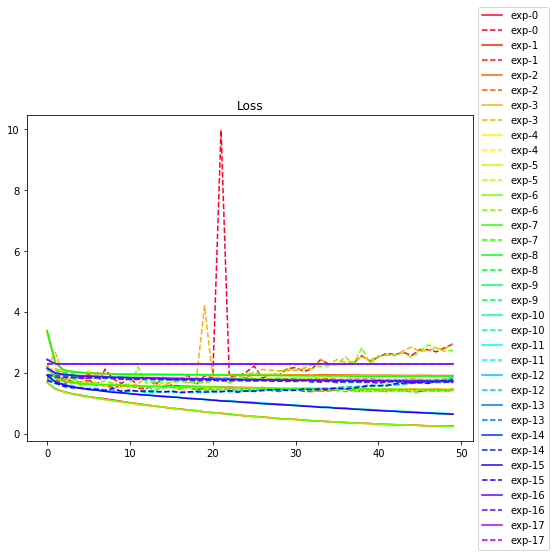

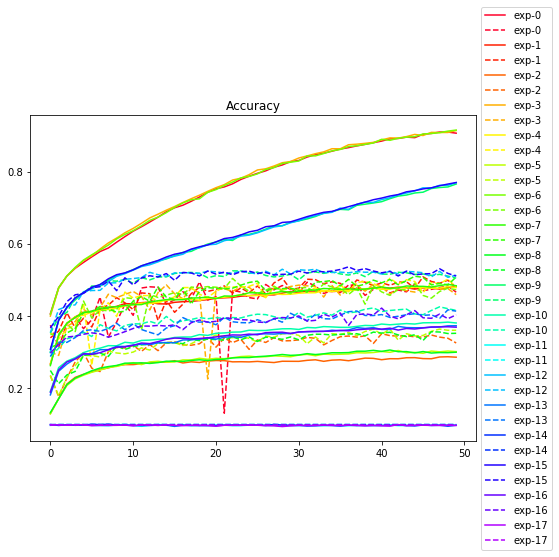

In [10]:
import matplotlib.pyplot as plt
import matplotlib.cm as mplcm
import matplotlib.colors as colors
%matplotlib inline
"""Code Here
將結果繪出
"""
NUM_COLORS = 20

cm = plt.get_cmap('gist_rainbow')
cNorm  = colors.Normalize(vmin=0, vmax=NUM_COLORS-1)
scalarMap = mplcm.ScalarMappable(norm=cNorm, cmap=cm)
color_bar = [scalarMap.to_rgba(i) for i in range(NUM_COLORS)]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()